In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# read in csv
df = pd.read_csv('../data/Production_Crops_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")

# clean column names
cols = df.columns
cols = [col.lower().replace(' ', '_') for col in cols]
new_cols = []
for col in cols:
    if col[0] == 'y':
        new_cols.append(col[1:])
    else:
        new_cols.append(col)
df.columns = new_cols

df = df[df['area_code']<1000]
df = df[df['area'] != 'China, mainland']

In [40]:
def global_change_rate(crop,element='Yield'):
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element)]
    change_rate = []
    for i in range(1,57):
        rate = (np.mean(df_filtered.iloc[:,i+7])/np.mean(df_filtered.iloc[:,i+6]))
        change_rate.append(rate -1)
    return change_rate

In [82]:
def global_constant_increase(element='Yield',threshold=.001):
    crops = df['item'].unique()
    
    lst=[]
    
    for crop in crops:
        rate_changes = global_change_rate(crop)
        current_count = 0
        max_count = 0
        for rate in rate_changes:
            if rate > threshold:
                current_count += 1
            else:
                if max_count < current_count:
                    max_count = current_count
                current_count = 0
        if max_count < current_count:
            max_count = current_count
        lst.append((crop,current_count))
    
    return pd.DataFrame(lst).sort_values(1,ascending=False)

In [83]:
global_constant_increase('Yield')

,0,1
169,Cloves,13
73,"Pumpkins, squash and gourds",10
144,Plantains and others,7
125,Safflower seed,6
58,Chestnut,6
70,Okra,5
87,Chick peas,4
111,Sisal,4
88,"Chillies and peppers, dry",4
135,Persimmons,4


In [68]:
def plot_top_countries(crop,element='Yield'):
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element)]
    df_filtered['avg']=df_filtered.iloc[:,7:].mean(axis=1)
    df_filtered = df_filtered.sort_values('avg',ascending=False).head(5)
    
    fig,ax = plt.subplots(figsize=(16,10))
    
    for i in range(df_filtered.shape[0]):
        x=df_filtered.columns[7:64]
        y=df_filtered.iloc[i,7:64]   
        ax.plot (x,y)
        for label in ax.xaxis.get_ticklabels()[::2]:
            label.set_visible(False)
        ax.set_title('{}, {} by Country (top 5 producers on average)'.format(crop,element),size=18)
        ax.set_xlabel('Year',size=18)
        ylabel = df_filtered['unit'].head(1).iloc[0]
        ax.set_ylabel(ylabel,size=18)
        ax.legend(labels=df_filtered['area'].values)
    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


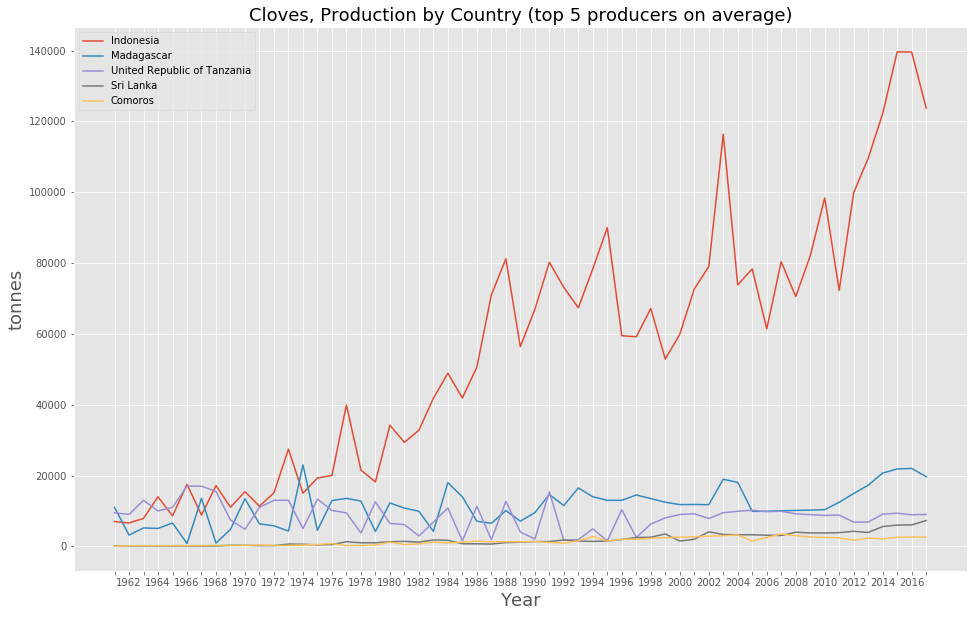

In [84]:
plot_top_countries('Cloves','Production')